In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
##function ot find distance between two geocodes
def distance(p1,p2):
    return geodesic(p1,p2).km

In [4]:
## function to create distnace matrix that tells the distnace between every two points
def create_distance_matrix(df):
    arr = np.zeros((df.shape[0],df.shape[0]))
    
    idx_list = df.index
    for i in idx_list:
        p1 = (df.loc[i,'Latitude'],df.loc[i,'Longitude'])
        
        for j in idx_list:
            p2 = (df.loc[j,'Latitude'],df.loc[j,'Longitude'])
            
            arr[i,j] = distance(p1,p2)
            
    return arr

In [5]:
##function to find change in distance if two edges are deleted are two new are created among 4 points
def cost_change(cost_mat, n1, n2, n3, n4):
    return cost_mat[n1][n3] + cost_mat[n2][n4] - cost_mat[n1][n2] - cost_mat[n3][n4]

## function to return all routes after intercahnging the edges
def two_opt(initial_route, cost_mat):
    route = initial_route.copy()
    all_routes = [route.copy()]
    best = route
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1: continue
                if cost_change(cost_mat, best[i - 1], best[i], best[j - 1], best[j]) < 0:
                    best[i:j] = best[j - 1:i - 1:-1]
                    improved = True
                    all_routes.append(best.copy())
        route = best
    return all_routes

In [6]:
df = pd.read_csv("Clustered Addresses.csv")

In [7]:
df.head()

,Unnamed: 0,Street,City,State/province/area,Zip code,Address,Latitude,Longitude,Geocodes,Zone
0,0,"V-33, Patel Nagar (w)",Delhi,Delhi,110008,"V-33, Patel Nagar (w), Delhi 110008",28.647259,77.165371,"(28.6472587, 77.1653712)",2
1,1,"Cccl Building, Jai Singh Road, Connaught Place",Delhi,Delhi,110001,"Cccl Building, Jai Singh Road, Connaught Place...",28.627018,77.215366,"(28.6270183, 77.2153664)",2
2,2,"3515, Chutani Manzil, Nicholson Road, Mori Gate",Delhi,Delhi,110006,"3515, Chutani Manzil, Nicholson Road, Mori Gat...",28.664203,77.223739,"(28.664203, 77.2237393)",2
3,3,"20b, Dsidc Shed, Tilak Nagar",Delhi,Delhi,110018,"20b, Dsidc Shed, Tilak Nagar, Delhi 110018",28.636548,77.096496,"(28.6365482, 77.0964961)",1
4,4,"32, Main, Lodhi Colony",Delhi,Delhi,110003,"32, Main, Lodhi Colony, Delhi 110003",28.586203,77.226858,"(28.586203, 77.2268576)",0


In [8]:
zone_3 = df.loc[df['Zone'] == 3]

In [9]:
zone_3 = zone_3.reset_index(drop = True)

In [10]:
address_dict = {}
for i in zone_3.index:
    address_dict[i] = df.iloc[i]['Address']

In [11]:
address_dict

{0: 'V-33, Patel Nagar (w), Delhi 110008',
 1: 'Cccl Building, Jai Singh Road, Connaught Place, Delhi 110001',
 2: '3515, Chutani Manzil, Nicholson Road, Mori Gate, Delhi 110006',
 3: '20b, Dsidc Shed, Tilak Nagar, Delhi 110018',
 4: '32, Main, Lodhi Colony, Delhi 110003',
 5: '4, 3000, Bhagwant Singh Market, Bahadur Garh Road, Sadar Bazar, Delhi 110006',
 6: 'Unit 1 B-257, Naraina Indl Area, Delhi 110028',
 7: '641/42, Shradhanand Marg, Behind 77, G B Road, Delhi 110006',
 8: '63-64, Main Market, Subzi Mandi, Delhi 110007',
 9: 'Plot No 3, Dabua Extn, Nit, Indl Area, Pali Road, Faridabad, Faridabad, Delhi 121001',
 10: '202 2nd Floor Furniture Block, Plot No 6 Kamal House Whs, Delhi 110015',
 11: 'Vasant Plaza, Near Subway, Munirka, Delhi 110067',
 12: 'C 16, Delhi 110001',
 13: 'F 20, United India Life Bldg, Connaught Place, Delhi 110001',
 14: 'Shop No 29, Beadon Pura, Ajmal Khan Road Gali No 2, Karol Bagh, Delhi 110005',
 15: '47-50, Dsidc Complex, Bahadur Shah Zafar M, Delhi 11000

In [12]:
from geopy.distance import geodesic

In [13]:
distance_matrix = create_distance_matrix(zone_3)

In [14]:
###function to create plot 
def create_plot(df,route_order):
    lats = []
    longs = []
    for i in route_order:
        lat = df.loc[i,'Latitude']
        lats.append(lat)
        
        long = df.loc[i,'Longitude']
        longs.append(long)
        
    plt.figure(figsize = (8,8))
    plt.scatter(longs,lats,color = 'Blue')
    plt.plot(longs,lats,color = 'yellow')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Locations")
    plt.show()

In [15]:
initial_route = list(zone_3.index)

In [16]:
initial_route

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [17]:
all_routes = two_opt(initial_route,distance_matrix)

In [18]:
all_routes

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [0, 5, 4, 3, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [0, 8, 7, 6, 2, 1, 3, 4, 5, 9, 10, 11, 12, 13, 14, 15, 16],
 [0, 10, 9, 5, 4, 3, 1, 2, 6, 7, 8, 11, 12, 13, 14, 15, 16],
 [0, 12, 11, 8, 7, 6, 2, 1, 3, 4, 5, 9, 10, 13, 14, 15, 16],
 [0, 13, 10, 9, 5, 4, 3, 1, 2, 6, 7, 8, 11, 12, 14, 15, 16],
 [0, 13, 4, 5, 9, 10, 3, 1, 2, 6, 7, 8, 11, 12, 14, 15, 16],
 [0, 13, 3, 10, 9, 5, 4, 1, 2, 6, 7, 8, 11, 12, 14, 15, 16],
 [0, 13, 3, 9, 10, 5, 4, 1, 2, 6, 7, 8, 11, 12, 14, 15, 16],
 [0, 13, 3, 9, 4, 5, 10, 1, 2, 6, 7, 8, 11, 12, 14, 15, 16],
 [0, 13, 3, 9, 4, 5, 10, 1, 11, 8, 7, 6, 2, 12, 14, 15, 16],
 [0, 13, 3, 9, 4, 5, 10, 1, 12, 2, 6, 7, 8, 11, 14, 15, 16],
 [0, 13, 3, 9, 4, 5, 10, 1, 12, 2, 6, 15, 14, 11, 8, 7, 16],
 [0, 4, 9, 3, 13, 5, 10, 1, 12, 2, 6, 15, 14, 11, 8, 7, 16],
 [0, 14, 15, 6, 2, 12, 1, 10, 5, 13, 3, 9, 4, 11, 8, 7, 16],
 [0, 11, 4, 9, 3, 13, 5,

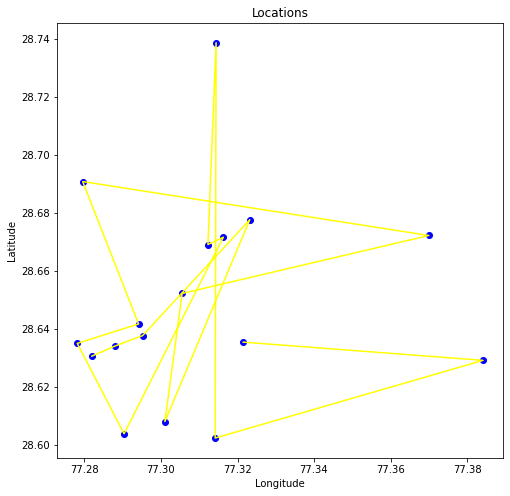

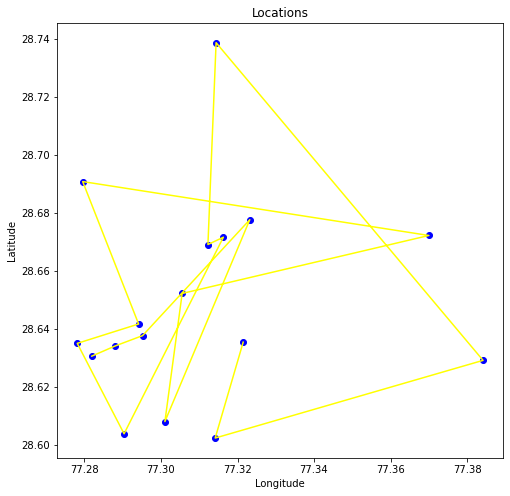

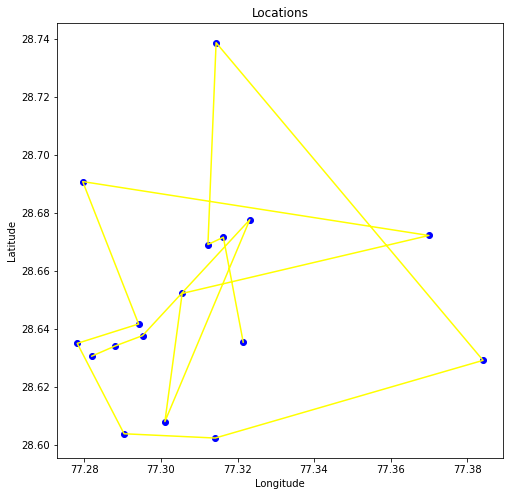

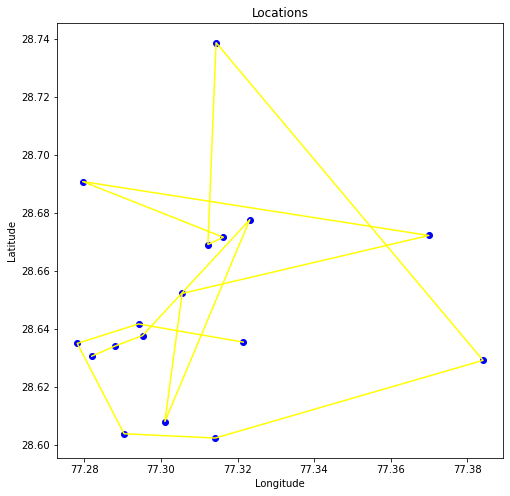

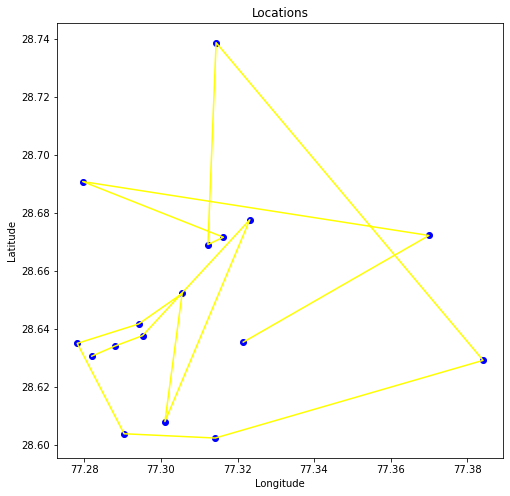

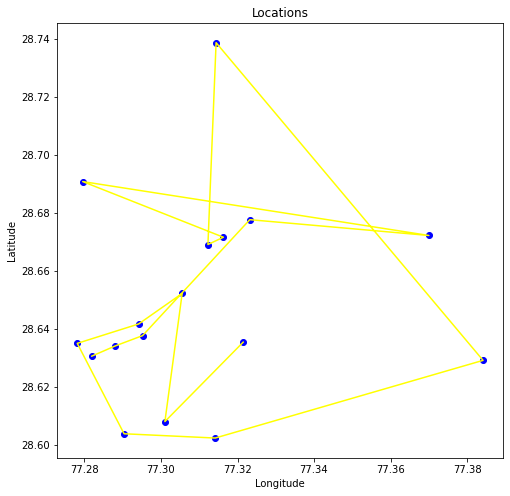

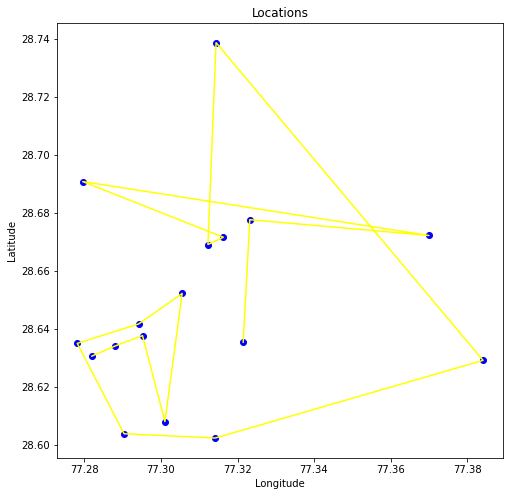

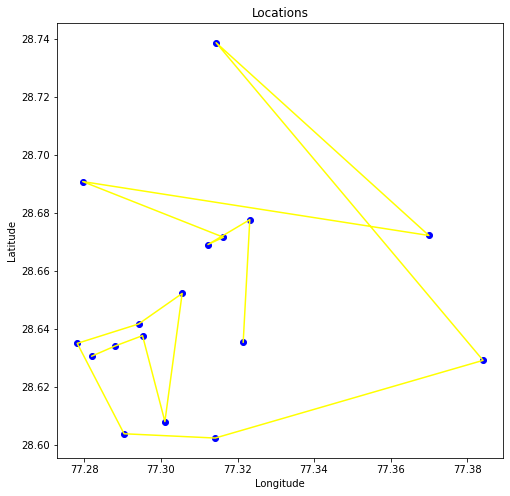

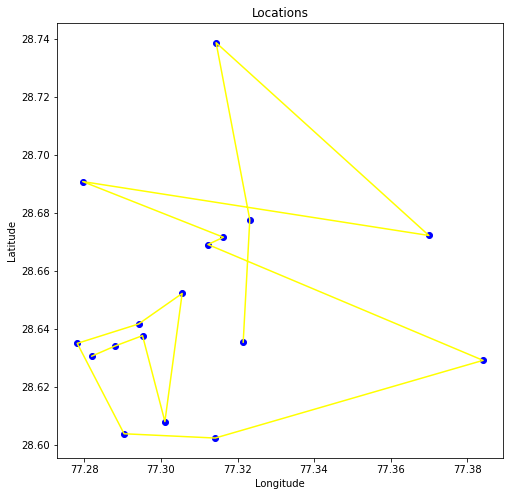

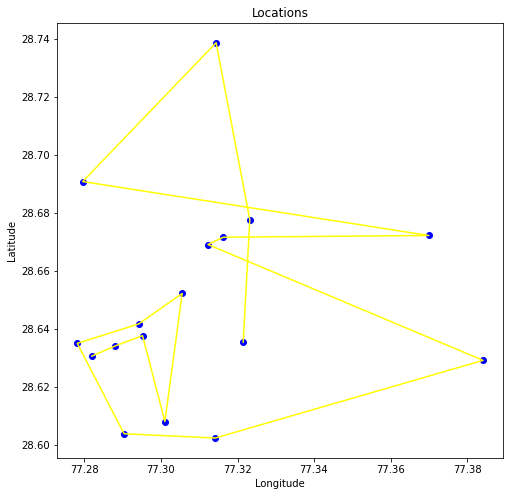

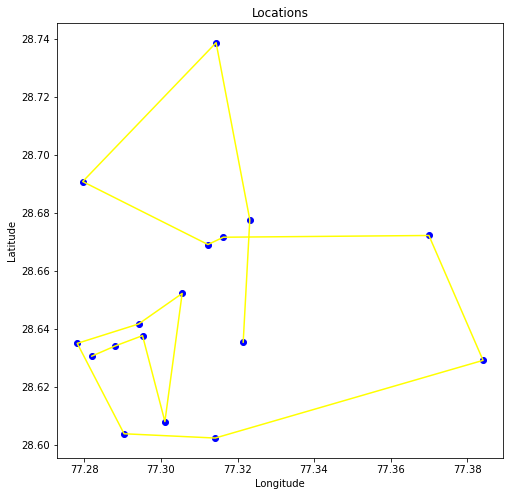

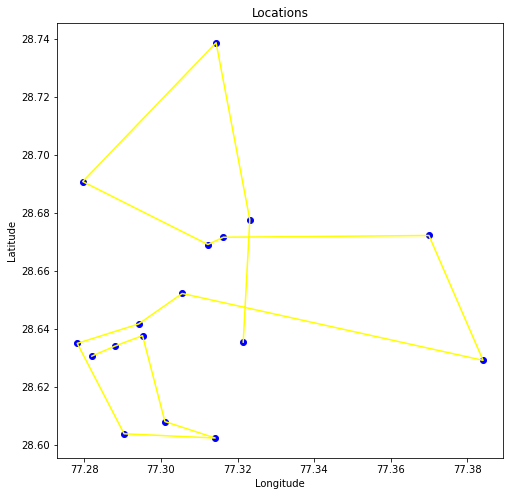

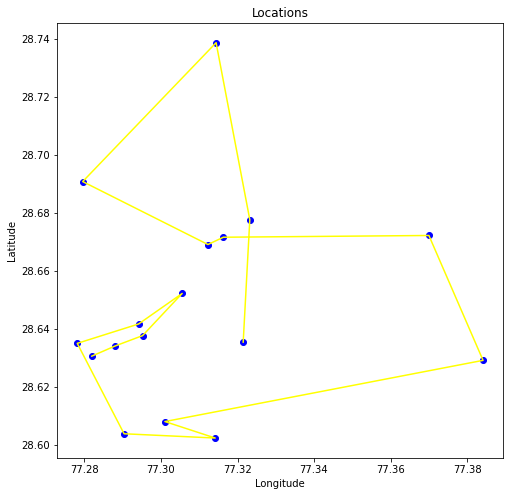

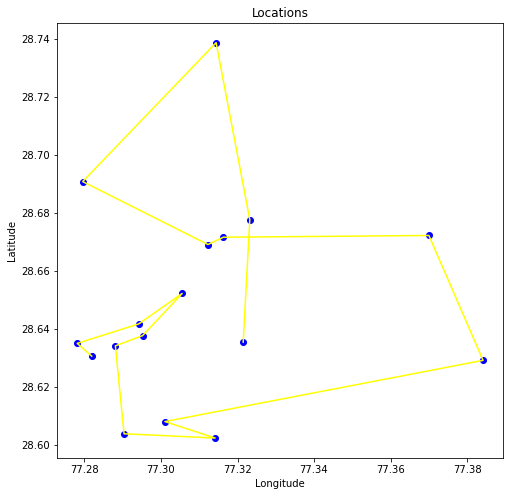

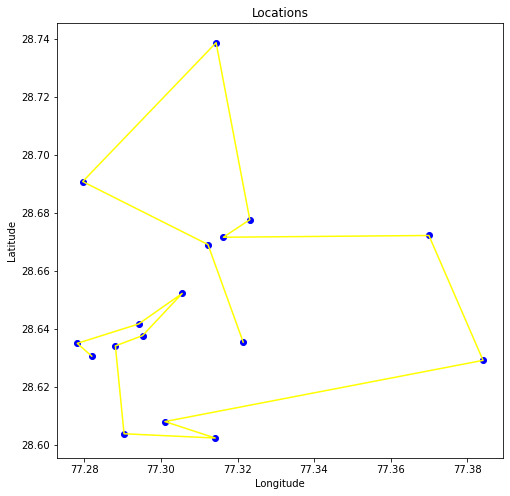

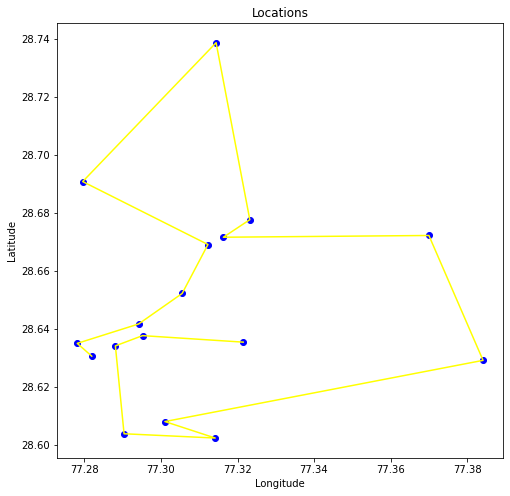

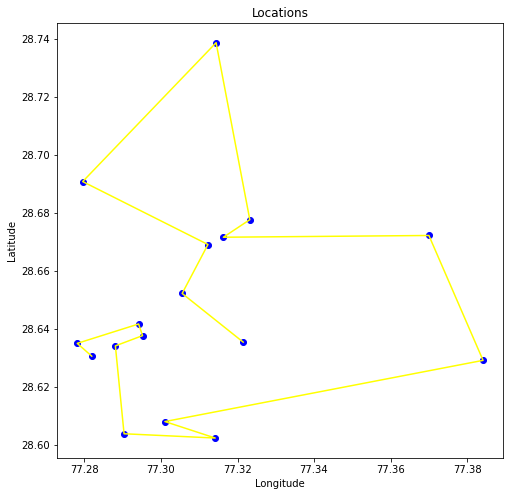

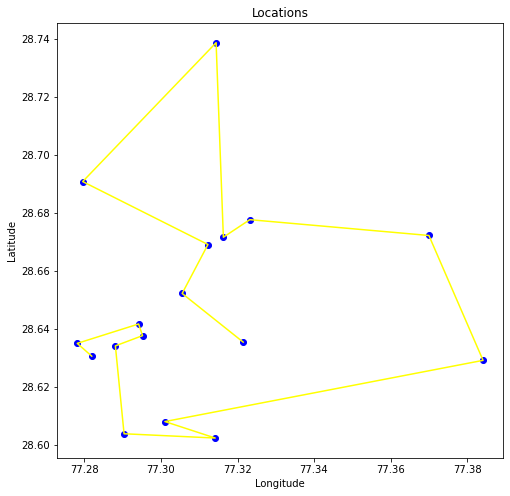

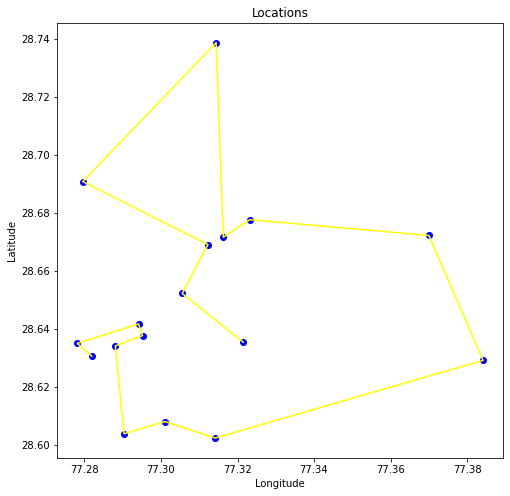

In [19]:
for i in all_routes:
    create_plot(zone_3,i)

In [20]:
from geopy.geocoders import Nominatim
nom = Nominatim(user_agent = 'tutorial',timeout = None)

def geocode_from_address(adr):
    
    location = None
    
    while location == None:
        location = nom.geocode(adr,timeout = None)
        if location != None:
            return (location.latitude,location.longitude)
        else:
            adr = ', '.join(adr.split(',')[1:])

In [21]:
starting_address = "Connaught Place, Delhi"

In [22]:
nom.geocode(starting_address)

Location(Connaught Place, Chanakya Puri Tehsil, New Delhi, Delhi, 110001, India, (28.6314022, 77.2193791, 0.0))

In [23]:
geocode_from_address(starting_address)

(28.6314022, 77.2193791)

In [24]:
def get_total_distance(df,order):
    ordered_df = df.loc[order]
    
    geocodes = []
    
    for _,row in ordered_df.iterrows():
        geocode = row['Latitude'], row['Longitude']
        geocodes.append(geocode)
        
    td = 0
    
    for i in range(len(geocodes)-1):
        d = distance(geocodes[i], geocodes[i+1])
        td += d
    
    return td

In [25]:
def save_zone_order(df,zone,starting_address,final_filename,page_filename):
    
    zone_df = df.loc[df['Zone'] == zone]
    zone_df = zone_df.reset_index(drop = True)
    
    required_cols = ['Address','Latitude','Longitude','Zone']
    zone_df = zone_df[required_cols]
    
    start_lat,start_long = geocode_from_address(starting_address)
    
    zone_df.loc[-1] = [starting_address,start_lat,start_long,zone]

    zone_df.sort_index(inplace = True)
    zone_df.reset_index(drop = True,inplace = True)
    
    
    distance_matrix = create_distance_matrix(zone_df)
    initial_route = list(zone_df.index)
    
    all_routes = two_opt(initial_route,distance_matrix)
    
    final_route = all_routes[-1]
    final_distance = get_total_distance(zone_df,final_route)
    final_route_df = zone_df.loc[final_route]
    
    final_route_df.reset_index(drop = True,inplace = True)
    final_route_df['Total Distance'] = final_distance
    final_route_df['Total Distance'] = final_route_df['Total Distance'].apply(lambda x: round(x,2))
    
    final_route_df.to_csv(final_filename)
    print("Route Order for Zone {} saved successfully as {}".format(zone,final_filename))
    
    ##### Saving Page Dataframe for Visualization in Tableau
    
    page_df = pd.DataFrame(columns = required_cols+['Page','Total Distance','Order'])
    
    for i,order in enumerate(all_routes):
        
        current_page_df = zone_df.loc[order]
        current_page_df['Page'] = i
        current_page_df['Total Distance'] = get_total_distance(current_page_df,order)
        current_page_df['Total Distance'] = current_page_df['Total Distance'].apply(lambda x: round(x,2))
        current_page_df['Order'] = np.arange(len(current_page_df))
        page_df = page_df.append(current_page_df)
        
    page_df.reset_index(drop = True,inplace = True)
    
    page_df.to_csv(page_filename)
    
    print("Page Filename  for zone {} saved successfully as {}".format(zone,page_filename))
    

    
    

In [26]:
for zone in df["Zone"].unique():
    page_filename = "all_routes_{}.csv".format(zone)
    final_filename = "final_route_{}.csv".format(zone)
    
    save_zone_order(df,zone,starting_address,final_filename,page_filename)
    print("------------------------------------------------------------------")
    

Route Order for Zone 2 saved successfully as final_route_2.csv
Page Filename  for zone 2 saved successfully as all_routes_2.csv
------------------------------------------------------------------
Route Order for Zone 1 saved successfully as final_route_1.csv
Page Filename  for zone 1 saved successfully as all_routes_1.csv
------------------------------------------------------------------
Route Order for Zone 0 saved successfully as final_route_0.csv
Page Filename  for zone 0 saved successfully as all_routes_0.csv
------------------------------------------------------------------
Route Order for Zone 3 saved successfully as final_route_3.csv
Page Filename  for zone 3 saved successfully as all_routes_3.csv
------------------------------------------------------------------
